In [1]:
from alpaca import Telescope, Camera, FilterWheel
import ciboulette.base.ciboulette as Cbl
import ciboulette.sector.sector as Sct
import ciboulette.utils.ephemcc as Eph
import ciboulette.utils.exposure as Exp
import ciboulette.utils.planning as Pln


#### Initialization of objects

In [2]:
cbl = Cbl.Ciboulette()
ephcc = Eph.Ephemcc()
sct = Sct.Sector()
exp = Exp.Exposure()
planning = Pln.Planning('1Yc-QxFr9veMeGjqvedRMrcEDL2GRyTS_','planning.csv')
planningtable = planning.get()

100% [..................................................................................] 291 / 291

## Ciboulette tests

- Table test
- Filter test

In [1]:
import ciboulette.base.ciboulette as Cbl
cbl = Cbl.Ciboulette()

In [2]:
table_cbl = cbl.table

In [3]:
cbl.serverport = {"SVR": '192.168.1.30',"PORT": 7624}

In [4]:
cbl.serverport

'192.168.1.30:7624'

In [2]:
cbl.filtername

'L'

In [3]:
cbl.filtername = 'SA200'
cbl.filtername

'SA200'

In [7]:
cbl.site

(49.5961, -0.3531, 100)

In [9]:
cbl.site = {"LAT": 49.51,"LONG": 359.65,"ELEV": 105}
cbl.site

(49.51, 359.55, 105.0)

In [3]:
table_cbl.pprint(max_width=255)

API        SERVER       DEVICE FOCAL DIAM SITE_LAT SITE_LONG SITE_ELEV  INSTRUME  NAXIS1 NAXIS2 BINXY PIXELXY FILTER     NAME     OBSERVER DATASET     ARCHIVES      RA DEC  OBJECT
---- ------------------ ------ ----- ---- -------- --------- --------- ---------- ------ ------ ----- ------- ------ ------------ -------- ------- ---------------- --- ---- ------
2000 192.168.1.18:11111      0  85.0 85.0  49.5961   -0.3531       100 Atik 383L+   3326   2504     1     5.4      L CIBOULETTE-A     CAM1 dataset dataset/archives 0.0 90.0   INIT


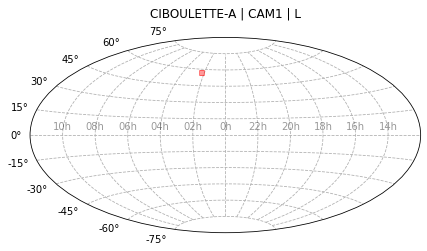

In [4]:
cbl.coordinates = { "RA": 2.30, "DEC": 57.20 }
cbl.projections

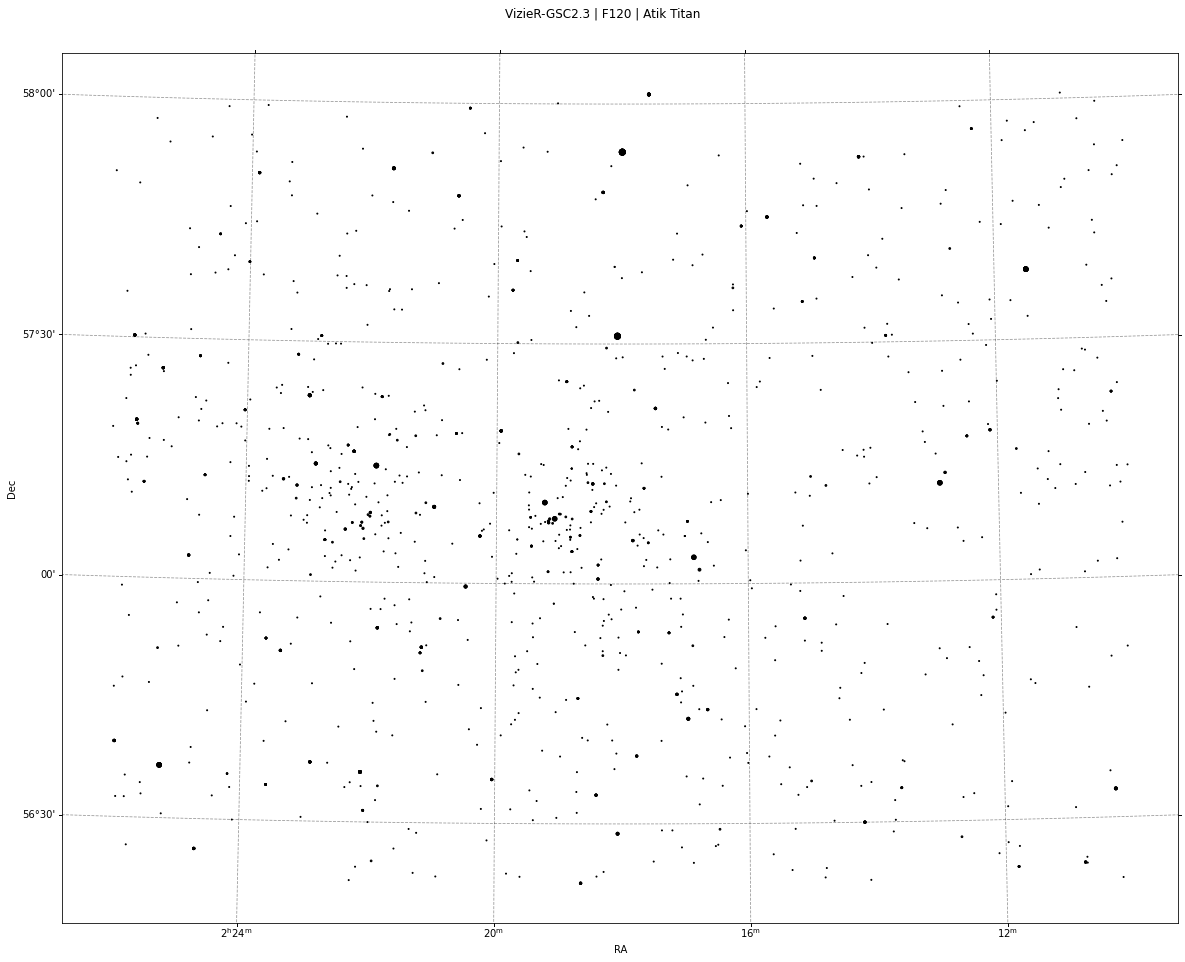

In [6]:
cbl.sigma120_400 = 120
cbl.atiktitan
cbl.starmap

In [8]:
from alpaca import Telescope, Camera, FilterWheel
import ciboulette.base.ciboulette as Cbl
import ciboulette.utils.planning as Pln
from ciboulette.indiclient.filterwheel import FILTERWheelATIK

In [15]:
cbl = Cbl.Ciboulette()

cbl.serverport = {"SVR": '192.168.1.18',"PORT": 11111}
asi_efw = FilterWheel(cbl.serverport, cbl.device)

cbl.serverport = {"SVR": '192.168.1.30',"PORT": 7624}
#atik_efw = FILTERWheelATIK(cbl.server, cbl.port)

planning = Pln.Planning('1Yc-QxFr9veMeGjqvedRMrcEDL2GRyTS_','planning.csv')
planningtable = planning.get

In [16]:
planningtable.pprint(max_width=255)
plan = planningtable[2]

cbl.filtername = planning.filtername(plan)
cbl.filterwheel(asi_efw)
cbl.filterwheel(atik_efw)

target_name s_ra s_dec t_exptime  obs_id  binning filters dataproduct_type      obs_title     
----------- ---- ----- --------- -------- ------- ------- ---------------- -------------------
    SECTOR1  5.3  73.9        60        1       1     CLS        intensity                none
    SECTOR1  5.3  70.9        60        2       1    OIII        intensity                none
    SECTOR1  5.3  67.9        60        3       1       L            black test black sequence
    SECTOR1  5.3  64.9        60 20210001       1   SA200        intensity                none


In [9]:
from astropy.table import Table
plan = Table()
plan['target_names'] = ['M1']
plan['s_ra'] = ['5.24']
plan['s_dec'] = ['42.64']
plan['t_exptime'] = ['300']
plan['obs_id'] = ['251']
plan['binning'] = ['1']
plan['filters'] = ['SA200']
plan['dataproduct_type'] = ['light']
plan['obs_title'] = ['none']

planning.getRA(plan)[0],planning.getDEC(plan)[0],planning.getfilter(plan)[0],planning.getobservationID(plan)[0]

('5.24', '42.64', 'SA200', '251')

## Ephemcc class tests

In [1]:
import ciboulette.utils.ephemcc as Eph
import ciboulette.base.ciboulette as Cbl
cbl = Cbl.Ciboulette()
ephcc = Eph.Ephemcc()
cbl.site_lat = 40.235
ephcc.observer = cbl.ephemccgetobserver()
ephcc.observers 

'-0.3531%2040.235%20100'

In [3]:
ephcc.ep = '2021-02-11T22:00:00'
ephcc.ndb = 10
ephcc.get.pprint(max_width=255)

  target          epoch                ra           dec         distance       mv   phase  elongation  dracosdec       ddec       dist_dot  
                                    "h:m:s"       "d:m:s"          AU                deg      deg     arcsec / min arcsec / min    km / s   
--------- ---------------------- ------------- ------------- -------------- ------- ------ ---------- ------------ ------------ ------------
C/2020 M3 2021-02-11T22:00:00.00 05 47 50.8889 +48 31  7.850    1.304197755  16.970  25.03      121.0      0.56001     -0.10176   30.9442019
C/2020 M3 2021-02-12T22:00:00.00 05 49 15.5292 +48 28 46.942    1.322067184  17.040  25.08     120.35      0.56844     -0.10831   31.1395724
C/2020 M3 2021-02-13T22:00:00.00 05 50 41.2519 +48 26 16.885     1.34004724  17.110  25.12     119.71      0.57665     -0.11459   31.3321177
C/2020 M3 2021-02-14T22:00:00.00 05 52  8.0186 +48 23 38.040    1.358136295  17.180  25.16     119.07      0.58462     -0.12063   31.5218233
C/2020 M3 202

In [4]:
from astropy import units as u
from astropy.coordinates import SkyCoord, Angle
from astropy.io.votable import parse_single_table

table = parse_single_table(ephcc.filename).to_table()
table

target,epoch,ra,dec,distance,mv,phase,elongation,dracosdec,ddec,dist_dot
,,"""h:m:s""","""d:m:s""",AU,,deg,deg,arcsec / min,arcsec / min,km / s
str20,str24,str13,str13,float64,float32,float64,float64,float64,float64,float64
C/2020 M3,2021-02-11T22:00:00.00,05 47 50.8889,+48 31 7.850,1.304197755,16.970,25.03,121.0,0.56001,-0.10176,30.9442019
C/2020 M3,2021-02-12T22:00:00.00,05 49 15.5292,+48 28 46.942,1.322067184,17.040,25.08,120.35,0.56844,-0.10831,31.1395724
C/2020 M3,2021-02-13T22:00:00.00,05 50 41.2519,+48 26 16.885,1.34004724,17.110,25.12,119.71,0.57665,-0.11459,31.3321177
C/2020 M3,2021-02-14T22:00:00.00,05 52 8.0186,+48 23 38.040,1.358136295,17.180,25.16,119.07,0.58462,-0.12063,31.5218233
C/2020 M3,2021-02-15T22:00:00.00,05 53 35.7905,+48 20 50.751,1.376332722,17.240,25.2,118.43,0.59235,-0.12643,31.7086962
C/2020 M3,2021-02-16T22:00:00.00,05 55 4.5291,+48 17 55.339,1.394634902,17.310,25.23,117.8,0.59985,-0.13201,31.8927572
C/2020 M3,2021-02-17T22:00:00.00,05 56 34.1957,+48 14 52.112,1.413041228,17.380,25.26,117.16,0.60712,-0.13738,32.0740354
C/2020 M3,2021-02-18T22:00:00.00,05 58 4.7521,+48 11 41.355,1.431550113,17.450,25.28,116.53,0.61416,-0.14255,32.2525639


In [5]:
c = SkyCoord(table['ra'], table['dec'], unit='deg', frame='icrs')
c.ra.degree*15,c.dec.degree

(array([86.96203708, 87.314705  , 87.67188292, 88.03341083, 88.39912708,
        88.76887125, 89.14248208, 89.51980042, 89.90067   , 90.284935  ]),
 array([48.51884722, 48.47970611, 48.43802361, 48.3939    , 48.34743083,
        48.29870528, 48.24780889, 48.19482083, 48.13981722, 48.08286917]))

In [3]:
lat = -0.21
ephcc.observers = { "LAT": 45.2, "LONG": lat, "ELEV": 150 }
ephcc.observers 

'-0.21%2045.2%20150.0'

## Check sofware tests

In [16]:
sectortable = sct.readarchives(cbl.archive_table)

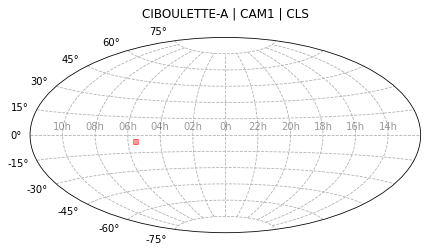

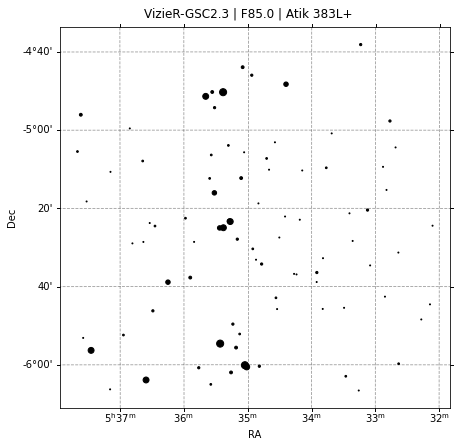

In [17]:
cbl.ra = 5.58
cbl.dec = -5.36
cbl.projections(sectortable)
cbl.starmap()

## Planning tests

Reading a google drive file and transforms it into a planning table

In [1]:
import ciboulette.utils.planning as Pln
planning = Pln.Planning('1Yc-QxFr9veMeGjqvedRMrcEDL2GRyTS_','planning.csv')
planningtable = planning.get

In [2]:
planningtable.pprint(max_width=255)

target_name s_ra s_dec t_exptime  obs_id  binning filters dataproduct_type      obs_title     
----------- ---- ----- --------- -------- ------- ------- ---------------- -------------------
    SECTOR1  5.3  73.9        60        1       1     CLS        intensity                none
    SECTOR1  5.3  70.9        60        2       1    OIII        intensity                none
    SECTOR1  5.3  67.9        60        3       1       L            black test black sequence
    SECTOR1  5.3  64.9        60 20210001       1   SA200        intensity                none


In [3]:
plan = planningtable[2]
planning.ra(plan),planning.dec(plan),planning.filtername(plan),planning.observationID(plan),planning.exptime(plan)

(5.3, 67.9, 'L', 3, 60)

In [4]:
from astropy.table import Table
plan = Table()
plan['target_names'] = ['M1']
plan['s_ra'] = ['5.24']
plan['s_dec'] = ['42.64']
plan['t_exptime'] = ['300']
plan['obs_id'] = ['251']
plan['binning'] = ['1']
plan['filters'] = ['SA200']
plan['dataproduct_type'] = ['light']
plan['obs_title'] = ['none']

planning.ra(plan)[0],planning.dec(plan)[0],planning.filtername(plan)[0],planning.observationID(plan)[0],planning.exptime(plan)[0]

('5.24', '42.64', 'SA200', '251', '300')

## Exposure class tests

In [6]:
import ciboulette.utils.exposure as Exp
exp = Exp.Exposure()
exp.today_to_label

In [7]:
exp.exp_label

'20210227194723'

In [8]:
exp.exp_time = 200

In [9]:
exp.exp_time

200

#### INDICLIENT tests

In [1]:
from ciboulette.indiclient.camera import ASICam120Mini

indi_server = '192.168.1.30'
indi_port = 7624


ccd = ASICam120Mini(indi_server,indi_port)
ccd.connect()

<newSwitchVector device="ZWO CCD ASI120MM Mini" name="CCD_VIDEO_FORMAT"> <oneSwitch name="ASI_IMG_RAW8"> Off</oneSwitch> <oneSwitch name="ASI_IMG_RAW16"> On</oneSwitch> </newSwitchVector> 
<newSwitchVector device="ZWO CCD ASI120MM Mini" name="CONNECTION"> <oneSwitch name="CONNECT"> On</oneSwitch> <oneSwitch name="DISCONNECT"> Off</oneSwitch> </newSwitchVector> 


In [2]:
obs = ccd.observer
print(obs)

Unknown


In [2]:
ccd.raw16

<newSwitchVector device="ZWO CCD ASI120MM Mini" name="CCD_VIDEO_FORMAT"> <oneSwitch name="ASI_IMG_RAW8"> Off</oneSwitch> <oneSwitch name="ASI_IMG_RAW16"> On</oneSwitch> </newSwitchVector> 


In [4]:
info = ccd.ccd_info
print(info)

{'CCD_MAX_X': 1280.0, 'CCD_MAX_Y': 960.0, 'CCD_PIXEL_SIZE': 3.75, 'CCD_PIXEL_SIZE_X': 3.75, 'CCD_PIXEL_SIZE_Y': 3.75, 'CCD_BITSPERPIXEL': 16.0}


In [7]:
hdul = ccd.expose(exptime=20.0)

In [8]:
hdul.info()

Filename: <class '_io.BytesIO'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   (1280, 960)   int16 (rescales to uint16)   


In [9]:
hdul[0].data

array([[  32,   32,  272, ...,   32,   32,   80],
       [  32,   32,  192, ...,   32,  128,   96],
       [ 384,   32,   32, ...,   32,  112,   32],
       ...,
       [ 400,  144,  416, ...,   32, 1280,  160],
       [  48,   96,  256, ...,   32,   80,  336],
       [ 832,  240,  288, ...,  144,   80,  336]], dtype=uint16)

In [10]:
hdul[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1280 / length of data axis 1                          
NAXIS2  =                  960 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
ROWORDER= 'TOP-DOWN'           / Row Order                                      
INSTRUME= 'ZWO CCD ASI120MM Mini' / CCD Name                                    
TELESCOP= 'Telescope Simulat

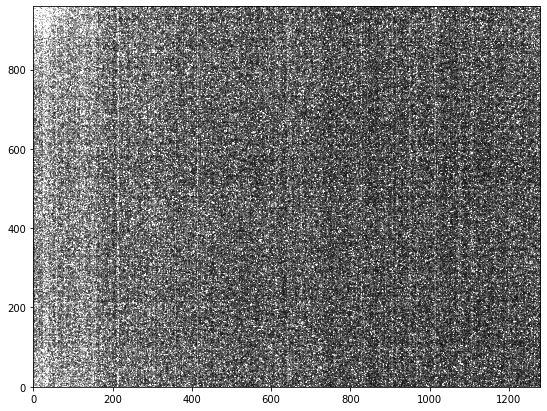

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
fig.add_axes(ax) 
ax.grid(b = False)
plt.imshow(hdul[0].data, origin='lower', cmap='gray',vmin = 16, vmax = 250)
plt.show()

In [6]:
print(ccd.activedevices)

     TELESCOPE           ROTATOR      ...      FILTER      SKYQUALITY
------------------- ----------------- ... ---------------- ----------
Telescope Simulator Rotator Simulator ... ZWO ASI EFW Mini        SQM


In [5]:
ccd.activedevicefilter = 'ZWO ASI EFW Mini'

<newTextVector device="ZWO CCD ASI120MM Mini" name="ACTIVE_DEVICES"> <oneText name="ACTIVE_TELESCOPE"> Telescope Simulator</oneText> <oneText name="ACTIVE_ROTATOR"> Rotator Simulator</oneText> <oneText name="ACTIVE_FOCUSER"> Focuser Simulator</oneText> <oneText name="ACTIVE_FILTER"> ZWO ASI EFW Mini</oneText> <oneText name="ACTIVE_SKYQUALITY"> SQM</oneText> </newTextVector> 


In [13]:
ccd.quit()

#### FILTERWheel test

In [2]:
from ciboulette.indiclient.filterwheel import FILTERWheelSimulator

indi_server = '192.168.1.30'
indi_port = 7624


filterwheel = FILTERWheelSimulator(indi_server,indi_port)
filterwheel.connect()

In [3]:
filterwheel.filter_name

'Filter Simulator'

In [4]:
filterwheel.connected

True

In [5]:
filterwheel.filter

'OIII'

In [6]:
filterwheel.filters

['Red', 'Green', 'Blue', 'H_Alpha', 'SII', 'OIII', 'LPR', 'Luminance']

In [7]:
filterwheel.filter = 4

In [8]:
filterwheel.filter

'SII'

In [9]:
filterwheel.filtername = 'OIII'

In [10]:
filterwheel.filter

'OIII'

In [11]:
filterwheel.filtername = 'OII'

In [12]:
filterwheel.filter

'OIII'

In [1]:
from ciboulette.indiclient.filterwheel import FILTERWheelATIK

indi_server = '192.168.1.30'
indi_port = 7624


filterwheel = FILTERWheelATIK(indi_server,indi_port)
filterwheel.connect()

In [2]:
filterwheel.filter

9

In [3]:
filterwheel.filters

['L', 'CLS', 'V', 'G', 'I', '328-742nm', 'OIII', 'Visible', 'SA200']

In [4]:
filterwheel.filternames = ['L', 'CLS', 'V', 'G', 'I', '328-742nm', 'OIII', '250nm', 'SA200']

In [5]:
filterwheel.filters

['L', 'CLS', 'V', 'G', 'I', '328-742nm', 'OIII', '250nm', 'SA200']

In [12]:
filterwheel.filtername = 'SA200'

In [13]:
filterwheel.filter

9

In [14]:
filterwheel.filtername

'SA200'

In [7]:
filterwheel.quit()

In [1]:
from ciboulette.indiclient.filterwheel import FILTERWheelASI

indi_server = '192.168.1.30'
indi_port = 7624


filterwheel = FILTERWheelASI(indi_server,indi_port)
filterwheel.connect()

In [2]:
filterwheel.filters

['Red', 'Green', 'Blue', 'H_Alpha', 'SII']

In [3]:
filterwheel.filternames = ['L', 'OIII', 'Ha', 'V', 'SA200']

In [4]:
filterwheel.filters

['L', 'OIII', 'Ha', 'V', 'SA200']

In [6]:
filterwheel.filter = 'V'

In [7]:
filterwheel.filter

4

In [8]:
filterwheel.filtername

'V'

#### ATIK CCD test

In [1]:
from ciboulette.indiclient.camera import ATIKCam383L

indi_server = '192.168.1.30'
indi_port = 7624


ATIKccd = ATIKCam383L(indi_server,indi_port)
ATIKccd.connect()

In [2]:
ATIKccd.observer = 'CAM2'
obs = ATIKccd.observer
print(obs)

CAM2


In [3]:
ATIKccd.updir = '/home/ubuntu/lab/dataset'

In [4]:
ATIKccd.prefix = obs + '_' + 'XXX'

In [5]:
print(ATIKccd.prefix),print(ATIKccd.updir)

CAM2_XXX
/home/ubuntu/lab/dataset


(None, None)

In [3]:
ATIKccd.temperature = -20

In [15]:
ATIKccd.temperature

-20.02

In [9]:
ATIKccd.cooling_off

<bound method CCDCam.cooling_off of <ciboulette.indiclient.camera.ATIKCam383L object at 0x000002845F21DA00>>

In [3]:
info = ATIKccd.ccd_info
print(info)

{'CCD_MAX_X': 3354.0, 'CCD_MAX_Y': 2529.0, 'CCD_PIXEL_SIZE': 5.400000095367432, 'CCD_PIXEL_SIZE_X': 5.400000095367432, 'CCD_PIXEL_SIZE_Y': 5.400000095367432, 'CCD_BITSPERPIXEL': 16.0}


In [4]:
t = ATIKccd.temperature
print(t)

8.58


In [5]:
ATIKccd.local

<bound method ATIKCam383L.local of <ciboulette.indiclient.camera.ATIKCam383L object at 0x0000027955713820>>

In [6]:
ATIKccd.client

In [7]:
ATIKccd.both

In [9]:
hdul = ATIKccd.expose(exptime=20.0)

In [26]:
hdul[0].data

array([[783, 978, 845, ..., 612, 582, 589],
       [355, 328, 351, ..., 350, 389, 388],
       [370, 359, 325, ..., 318, 365, 350],
       ...,
       [391, 413, 390, ..., 383, 420, 383],
       [404, 404, 414, ..., 378, 355, 394],
       [418, 399, 463, ..., 339, 439, 413]], dtype=uint16)

In [27]:
hdul[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 3354 / length of data axis 1                          
NAXIS2  =                 2529 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
ROWORDER= 'TOP-DOWN'           / Row Order                                      
INSTRUME= 'Atik 383L'          / CCD Name                                       
TELESCOP= 'Telescope Simulat

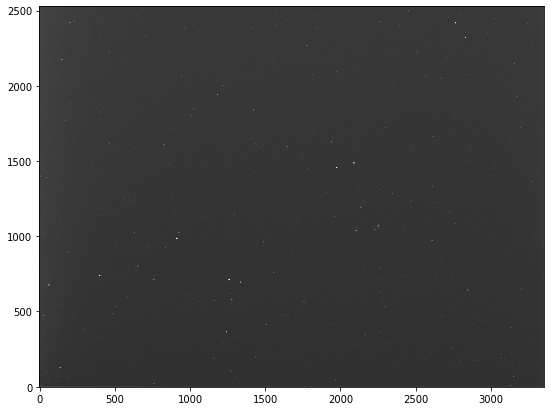

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
fig.add_axes(ax) 
ax.grid(b = False)
plt.imshow(hdul[0].data, origin='lower', cmap='gray',vmin = 200, vmax = 1000)
plt.show()

In [4]:
ATIKccd.quit()

### MOUNT tests

In [1]:
#from ciboulette.indiclient.telescope import telescopesimul EQMod
from ciboulette.indiclient.telescope import EQMod

indi_server = '192.168.1.30'
#indi_port = 7648
indi_port = 7624

#telescope = telescopesimul(indi_server,indi_port)
telescope = EQMod(indi_server,indi_port)
telescope.connect()

<newSwitchVector device="EQMod Mount" name="DEVICE_BAUD_RATE"> <oneSwitch name="9600"> Off</oneSwitch> <oneSwitch name="19200"> Off</oneSwitch> <oneSwitch name="38400"> Off</oneSwitch> <oneSwitch name="57600"> Off</oneSwitch> <oneSwitch name="115200"> On</oneSwitch> <oneSwitch name="230400"> Off</oneSwitch> </newSwitchVector> 
<newSwitchVector device="EQMod Mount" name="CONNECTION"> <oneSwitch name="CONNECT"> On</oneSwitch> <oneSwitch name="DISCONNECT"> Off</oneSwitch> </newSwitchVector> 


In [3]:
telescope.sitelatitude = 49.56
telescope.sitelongitude = -0.35
telescope.siteelevation = 100.0

<newNumberVector device="EQMod Mount" name="GEOGRAPHIC_COORD"> <oneNumber name="LAT"> 49.56</oneNumber> <oneNumber name="LONG"> -0.3499999999999999778</oneNumber> <oneNumber name="ELEV"> 100</oneNumber> </newNumberVector> 
<newNumberVector device="EQMod Mount" name="GEOGRAPHIC_COORD"> <oneNumber name="LAT"> 49.56</oneNumber> <oneNumber name="LONG"> -0.35</oneNumber> <oneNumber name="ELEV"> 100</oneNumber> </newNumberVector> 
<newNumberVector device="EQMod Mount" name="GEOGRAPHIC_COORD"> <oneNumber name="LAT"> 49.56</oneNumber> <oneNumber name="LONG"> -0.35</oneNumber> <oneNumber name="ELEV"> 100.0</oneNumber> </newNumberVector> 


In [4]:
telescope.sitelatitude,telescope.sitelongitude,telescope.siteelevation

(49.56, -0.35, 100.0)

In [2]:
telescope.parking

<newSwitchVector device="EQMod Mount" name="TELESCOPE_PARK"> <oneSwitch name="PARK"> Off</oneSwitch> <oneSwitch name="UNPARK"> On</oneSwitch> </newSwitchVector> 


In [2]:
telescope.unpark

<newSwitchVector device="EQMod Mount" name="TELESCOPE_PARK"> <oneSwitch name="PARK"> Off</oneSwitch> <oneSwitch name="UNPARK"> On</oneSwitch> </newSwitchVector> 


In [5]:
telescope.tracking

<newSwitchVector device="EQMod Mount" name="TELESCOPE_TRACK_STATE"> <oneSwitch name="TRACK_ON"> On</oneSwitch> <oneSwitch name="TRACK_OFF"> Off</oneSwitch> </newSwitchVector> 


In [6]:
telescope.untrack

<newSwitchVector device="EQMod Mount" name="TELESCOPE_TRACK_STATE"> <oneSwitch name="TRACK_ON"> Off</oneSwitch> <oneSwitch name="TRACK_OFF"> On</oneSwitch> </newSwitchVector> 


In [19]:
telescope.utc = '2021-02-24T18:00:00'

<newTextVector device="EQMod Mount" name="TIME_UTC"> <oneText name="UTC"> 2021-02-22T18:00:00</oneText> <oneText name="OFFSET"> -1.0</oneText> </newTextVector> 


In [7]:
telescope.utc

'2021-02-24T19:42:20'

In [12]:
telescope.offset = 1.0

<newTextVector device="EQMod Mount" name="TIME_UTC"> <oneText name="UTC"> 2021-02-21T23:00:00</oneText> <oneText name="OFFSET"> -1.0</oneText> </newTextVector> 


In [8]:
telescope.offset

'1.00'

In [9]:
telescope.target_pier_side = 'A'

<newSwitchVector device="EQMod Mount" name="TARGETPIERSIDE"> <oneSwitch name="AUTO"> On</oneSwitch> <oneSwitch name="PIER_WEST"> Off</oneSwitch> <oneSwitch name="PIER_EAST"> Off</oneSwitch> </newSwitchVector> 


In [16]:
telescope.target_pier_side = 'E'

<newSwitchVector device="EQMod Mount" name="TARGETPIERSIDE"> <oneSwitch name="AUTO"> Off</oneSwitch> <oneSwitch name="PIER_WEST"> Off</oneSwitch> <oneSwitch name="PIER_EAST"> On</oneSwitch> </newSwitchVector> 


In [8]:
telescope.target_pier_side = 'W'

<newSwitchVector device="EQMod Mount" name="TARGETPIERSIDE"> <oneSwitch name="AUTO"> Off</oneSwitch> <oneSwitch name="PIER_WEST"> On</oneSwitch> <oneSwitch name="PIER_EAST"> Off</oneSwitch> </newSwitchVector> 


In [10]:
print(telescope.telescope_pier_side)

WEST EAST
---- ----
  On  Off


In [2]:
print(telescope.telescope_park_position) 

    RA       DEC   
--------- ---------
8687794.0 9684608.0


In [9]:
print(telescope.telescope_track_mode)

SIDEREAL LUNAR SOLAR CUSTOM
-------- ----- ----- ------
      On   Off   Off    Off


In [13]:
telescope.telescope_track_mode = 'Sideral'

<newSwitchVector device="EQMod Mount" name="TELESCOPE_TRACK_MODE"> <oneSwitch name="TRACK_SIDEREAL"> On</oneSwitch> <oneSwitch name="TRACK_SOLAR"> Off</oneSwitch> <oneSwitch name="TRACK_LUNAR"> Off</oneSwitch> <oneSwitch name="TRACK_CUSTOM"> Off</oneSwitch> </newSwitchVector> 


In [12]:
telescope.synctocoordinates(9.5,65.5)

<newSwitchVector device="EQMod Mount" name="TELESCOPE_TRACK_STATE"> <oneSwitch name="TRACK_ON"> On</oneSwitch> <oneSwitch name="TRACK_OFF"> Off</oneSwitch> </newSwitchVector> 
<newSwitchVector device="EQMod Mount" name="ON_COORD_SET"> <oneSwitch name="TRACK"> Off</oneSwitch> <oneSwitch name="SLEW"> Off</oneSwitch> <oneSwitch name="SYNC"> On</oneSwitch> </newSwitchVector> 
<newNumberVector device="EQMod Mount" name="EQUATORIAL_EOD_COORD"> <oneNumber name="RA"> 9.5</oneNumber> <oneNumber name="DEC"> 62.98</oneNumber> </newNumberVector> 
<newNumberVector device="EQMod Mount" name="EQUATORIAL_EOD_COORD"> <oneNumber name="RA"> 9.5</oneNumber> <oneNumber name="DEC"> 65.5</oneNumber> </newNumberVector> 
<newSwitchVector device="EQMod Mount" name="ON_COORD_SET"> <oneSwitch name="TRACK"> On</oneSwitch> <oneSwitch name="SLEW"> Off</oneSwitch> <oneSwitch name="SYNC"> Off</oneSwitch> </newSwitchVector> 


In [16]:
telescope.slewtocoordinates(9.90,67.0)

<newSwitchVector device="EQMod Mount" name="TELESCOPE_TRACK_STATE"> <oneSwitch name="TRACK_ON"> On</oneSwitch> <oneSwitch name="TRACK_OFF"> Off</oneSwitch> </newSwitchVector> 
<newSwitchVector device="EQMod Mount" name="ON_COORD_SET"> <oneSwitch name="TRACK"> Off</oneSwitch> <oneSwitch name="SLEW"> On</oneSwitch> <oneSwitch name="SYNC"> Off</oneSwitch> </newSwitchVector> 
<newNumberVector device="EQMod Mount" name="EQUATORIAL_EOD_COORD"> <oneNumber name="RA"> 9.9</oneNumber> <oneNumber name="DEC"> 65.5</oneNumber> </newNumberVector> 
<newNumberVector device="EQMod Mount" name="EQUATORIAL_EOD_COORD"> <oneNumber name="RA"> 9.9</oneNumber> <oneNumber name="DEC"> 67.0</oneNumber> </newNumberVector> 
<newSwitchVector device="EQMod Mount" name="ON_COORD_SET"> <oneSwitch name="TRACK"> On</oneSwitch> <oneSwitch name="SLEW"> Off</oneSwitch> <oneSwitch name="SYNC"> Off</oneSwitch> </newSwitchVector> 


In [4]:
print(telescope.on_coord_set)

TRACK SLEW SYNC
----- ---- ----
  Off   On  Off


In [7]:
telescope.on_coord_set = 'Track'

<newSwitchVector device="EQMod Mount" name="ON_COORD_SET"> <oneSwitch name="TRACK"> On</oneSwitch> <oneSwitch name="SLEW"> Off</oneSwitch> <oneSwitch name="SYNC"> Off</oneSwitch> </newSwitchVector> 


In [7]:
telescope.baud_rate = '115200'

<newSwitchVector device="EQMod Mount" name="DEVICE_BAUD_RATE"> <oneSwitch name="9600"> Off</oneSwitch> <oneSwitch name="19200"> Off</oneSwitch> <oneSwitch name="38400"> Off</oneSwitch> <oneSwitch name="57600"> Off</oneSwitch> <oneSwitch name="115200"> On</oneSwitch> <oneSwitch name="230400"> Off</oneSwitch> </newSwitchVector> 


In [3]:
print(telescope.baud_rate)

9600 19200 38400 57600 115200 230400
---- ----- ----- ----- ------ ------
 Off   Off   Off   Off     On    Off


In [9]:
print(telescope.telescope_slew_rate)

 1x  2x  3x  4x  5x  6x  7x  8x  9x
--- --- --- --- --- --- --- --- ---
 On Off Off Off Off Off Off Off Off


In [7]:
telescope.telescope_slew_rate = 1

<newSwitchVector device="EQMod Mount" name="TELESCOPE_SLEW_RATE"> <oneSwitch name="1x"> On</oneSwitch> <oneSwitch name="2x"> Off</oneSwitch> <oneSwitch name="3x"> Off</oneSwitch> <oneSwitch name="4x"> Off</oneSwitch> <oneSwitch name="5x"> Off</oneSwitch> <oneSwitch name="6x"> Off</oneSwitch> <oneSwitch name="7x"> Off</oneSwitch> <oneSwitch name="8x"> Off</oneSwitch> <oneSwitch name="9x"> Off</oneSwitch> <oneSwitch name="SLEW_MAX"> Off</oneSwitch> <oneSwitch name="SLEWCUSTOM"> Off</oneSwitch> </newSwitchVector> 


In [12]:
print(telescope.telescope_info)

APERTURE FOCAL G_APERTURE G_FOCAL
-------- ----- ---------- -------
    60.0  85.0       60.0   150.0


In [11]:
telescope.telescope_aperture(60,'P')
telescope.telescope_focal(85,'P')
telescope.telescope_aperture(60,'G')
telescope.telescope_focal(150,'G')

<newNumberVector device="EQMod Mount" name="TELESCOPE_INFO"> <oneNumber name="TELESCOPE_APERTURE"> 60</oneNumber> <oneNumber name="TELESCOPE_FOCAL_LENGTH"> 1500</oneNumber> <oneNumber name="GUIDER_APERTURE"> 40</oneNumber> <oneNumber name="GUIDER_FOCAL_LENGTH"> 100</oneNumber> </newNumberVector> 
<newNumberVector device="EQMod Mount" name="TELESCOPE_INFO"> <oneNumber name="TELESCOPE_APERTURE"> 60</oneNumber> <oneNumber name="TELESCOPE_FOCAL_LENGTH"> 85</oneNumber> <oneNumber name="GUIDER_APERTURE"> 40</oneNumber> <oneNumber name="GUIDER_FOCAL_LENGTH"> 100</oneNumber> </newNumberVector> 
<newNumberVector device="EQMod Mount" name="TELESCOPE_INFO"> <oneNumber name="TELESCOPE_APERTURE"> 60</oneNumber> <oneNumber name="TELESCOPE_FOCAL_LENGTH"> 85</oneNumber> <oneNumber name="GUIDER_APERTURE"> 60</oneNumber> <oneNumber name="GUIDER_FOCAL_LENGTH"> 100</oneNumber> </newNumberVector> 
<newNumberVector device="EQMod Mount" name="TELESCOPE_INFO"> <oneNumber name="TELESCOPE_APERTURE"> 60</oneNumb

In [3]:
print(telescope.telescope_motion)

NORTH SOUTH EAST WEST
----- ----- ---- ----
  Off   Off  Off  Off


In [10]:
telescope.telescope_motion = 'N'

<newSwitchVector device="EQMod Mount" name="TELESCOPE_MOTION_NS"> <oneSwitch name="MOTION_NORTH"> On</oneSwitch> <oneSwitch name="MOTION_SOUTH"> Off</oneSwitch> </newSwitchVector> 


In [3]:
telescope.horizon_limits_alt = 30

<newNumberVector device="EQMod Mount" name="HORIZONLIMITSPOINT"> <oneNumber name="HORIZONLIMITS_POINT_AZ"> 0</oneNumber> <oneNumber name="HORIZONLIMITS_POINT_ALT"> 30</oneNumber> </newNumberVector> 


In [5]:
print(telescope.hemisphere)

NORTH SOUTH
----- -----
   On   Off


In [6]:
telescope.reversedec = 'D'

<newSwitchVector device="EQMod Mount" name="REVERSEDEC"> <oneSwitch name="ENABLE"> Off</oneSwitch> <oneSwitch name="DISABLE"> On</oneSwitch> </newSwitchVector> 


In [7]:
print(telescope.reversedec)

ENABLE DISABLE
------ -------
   Off      On


In [3]:
telescope.auxencoder = 'N'

<newSwitchVector device="EQMod Mount" name="AUXENCODER"> <oneSwitch name="AUXENCODER_OFF"> On</oneSwitch> <oneSwitch name="AUXENCODER_ON"> Off</oneSwitch> </newSwitchVector> 


In [4]:
telescope.abort

<newSwitchVector device="EQMod Mount" name="TELESCOPE_ABORT_MOTION"> <oneSwitch name="ABORT"> On</oneSwitch> </newSwitchVector> 


In [8]:
print(telescope.actidedevicesgps),print(telescope.actidedevicesdome)

GPS 
----
None
DOME
----
None


(None, None)

In [12]:
telescope.actidedevicesgps = None
telescope.actidedevicesdome = None

<newTextVector device="EQMod Mount" name="ACTIVE_DEVICES"> <oneText name="ACTIVE_GPS"> None</oneText> <oneText name="ACTIVE_DOME"> None</oneText> </newTextVector> 
<newTextVector device="EQMod Mount" name="ACTIVE_DEVICES"> <oneText name="ACTIVE_GPS"> None</oneText> <oneText name="ACTIVE_DOME"> None</oneText> </newTextVector> 


In [14]:
print(telescope.domepolicy)

IGNORED LOCKS
------- -----
     On   Off


In [6]:
telescope.domepolicy = 'L'

<newSwitchVector device="EQMod Mount" name="DOME_POLICY"> <oneSwitch name="DOME_IGNORED"> Off</oneSwitch> <oneSwitch name="DOME_LOCKS"> On</oneSwitch> </newSwitchVector> 


In [18]:
telescope.quit()

### Astroquery utility

In [1]:
from ciboulette.utils.astroquery import astroQ

In [2]:
astroq = astroQ()

In [4]:
ra,dec = astroq.positionsbyname('Alp Boo')
print(ra,dec)

14.26102 19.18240916666667


In [6]:
ra,dec = astroq.positionsbyname_deg('Alp Boo')
print(ra,dec)

213.9153 19.18240916666667
